In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
dataset=pd.read_csv(r"C:\Users\ggomare\Downloads\canada_per_capita_income.csv")

In [3]:
dataset.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
model1=LinearRegression()

In [5]:
dataset["income"]=dataset["per capita income (US$)"]

In [6]:
dataset.head(5)

,year,per capita income (US$),income
0,1970,3399.299037,3399.299037
1,1971,3768.297935,3768.297935
2,1972,4251.175484,4251.175484
3,1973,4804.463248,4804.463248
4,1974,5576.514583,5576.514583


In [7]:
dataset=dataset.drop(columns=["per capita income (US$)"])

In [8]:
dataset.head(4)

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248


In [9]:
model1.fit(dataset.drop(columns=["income"]),dataset["income"])

LinearRegression()

In [10]:
model1.predict([[2020]])

C:\Users\ggomare\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [11]:
model1.coef_

array([828.46507522])

In [12]:
model1.intercept_

-1632210.7578554575

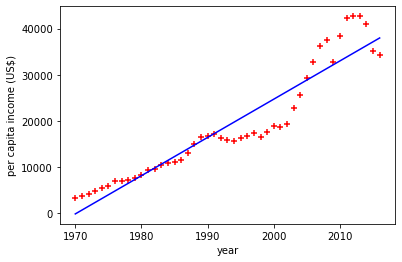

In [13]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(dataset.year,dataset.income,color='red',marker='+')
plt.plot(dataset.year,model1.predict(dataset[['year']]),color='blue')


# Multi-features linear regression

In [14]:
multidata=pd.read_csv(r"C:\Users\ggomare\Downloads\hiring.csv")

In [15]:
multidata.head(4)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000


In [16]:
multidata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
multidata.experience=multidata.experience.fillna("zero")

In [18]:
multidata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [19]:
from word2number import w2n

In [20]:
multidata.experience=multidata.experience.apply(w2n.word_to_num)

In [21]:
multidata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [22]:
multidata.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,8.00000,7.000000,8.000000,8.00000
mean,4.75000,7.857143,7.875000,63000.00000
std,4.26782,1.345185,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.500000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


In [23]:
mean=multidata["test_score(out of 10)"].mean()

In [24]:
mean

7.857142857142857

In [25]:
multidata["test_score(out of 10)"]=multidata["test_score(out of 10)"].fillna(mean)

In [26]:
multidata

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [27]:
model2=LinearRegression()

In [28]:
model2.fit(multidata.drop(columns=["salary($)"]),multidata["salary($)"])

LinearRegression()

In [29]:
model2.predict([[2,9,6]])

C:\Users\ggomare\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [30]:
model2.predict([[12,10,10]])

C:\Users\ggomare\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

# save model and load model using pickle and sklearn joblib

In [33]:
import pickle
with open("model_pickle",'wb') as f:
    pickle.dump(model2,f)


In [34]:
with open("model_pickle",'rb') as f:
    final_model=pickle.load(f)

In [35]:
final_model.predict([[12,10,10]])

C:\Users\ggomare\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

In [36]:
#for large dataset= joblib

In [39]:
import joblib

In [41]:
joblib.dump(model2,'model_joblib')

['model_joblib']

In [42]:
final_mo=joblib.load('model_joblib')

In [43]:
final_mo.predict([[12,10,10]])

C:\Users\ggomare\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])